In [114]:
#Importamos Librerias
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [115]:
#Leemos data frame

df=pd.read_csv('diamonds.csv')
print(df.head(5))

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75


PROCESAMIENTO DE NULOS

In [116]:
#Identificar valores nulos
valores_nulos=df.isnull().sum()
valores_nulos

carat      3
cut        0
color      0
clarity    0
depth      2
table      3
price      3
x          1
y          1
z          4
dtype: int64

In [117]:
#Realizamos una copia del dataframe
df2=df.copy()

In [118]:
#Sustituir valores nulos con promedio o media
df2["carat"]=df2["carat"].fillna(round(df["carat"].mean(),2))
df2["depth"]=df2["depth"].fillna(round(df["depth"].mean(),1))
df2["table"]=df2["table"].fillna(round(df["table"].mean(),1))
df2["price"] =df2["price"].fillna(method="ffill") #mejor con el datos adyacente pues los datos van de menor a mayor
df2["x"]=df2["x"].fillna(round(df["x"].mean(),0))
df2["y"]=df2["y"].fillna(round(df["y"].mean(),0))
df2["z"]=df2["z"].fillna(round(df["z"].mean(),0))

In [119]:
#Comprobación
#Identificar valores nulos
nulos=df2.isnull().sum()
nulos

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

PROCESAMIENTO DE OUTLIERS

<Figure size 1080x576 with 0 Axes>

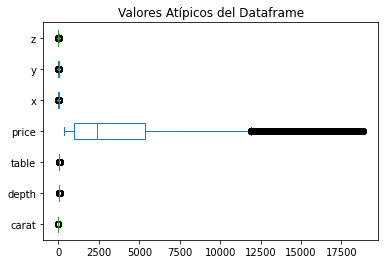

In [120]:
#Diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df2.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama en el que vemos que todas las variables tienen datos atípicos

In [121]:
#Método: desviación estandar. Encuentro los límites.
#Primera variable: carat
x1=df2["carat"]
LS1= x1.mean() + 3*x1.std()
LI1= x1.mean() - 3*x1.std()
print("Limite superior permitido", LS1)
print("Limite inferior permitido", LI1)

Limite superior permitido 2.2199529087395717
Limite inferior permitido -0.6240897274270025


In [122]:
#Primera sustitución: carat.
df3=df2[(x1<=LS1)&(x1>=LI1)] #Obtenemos datos sin outliers de price del DataFrame
df3["carat"]=df3["carat"].fillna(round(df2["carat"].mean(),2))

C:\Users\aremy\AppData\Local\Temp\ipykernel_14904\987974675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["carat"]=df3["carat"].fillna(round(df2["carat"].mean(),2))


In [123]:
#Método aplicando desviación estandar. Encuentro los límites.
#Segunda variable: depth
x2=df2["depth"]
LS2= x2.mean() + 3*x2.std()
LI2= x2.mean() - 3*x2.std()
print("Limite superior permitido", LS2)
print("Limite inferior permitido", LI2)

Limite superior permitido 66.04721656099112
Limite inferior permitido 57.45157098072191


In [124]:
#Segunda sustitución: depth.
df3=df2[(x2<=LS2)&(x2>=LI2)] #Obtenemos datos sin outliers de price del DataFrame
df3["depth"]=df3["depth"].fillna(round(df2["depth"].mean(),1))

C:\Users\aremy\AppData\Local\Temp\ipykernel_14904\3752380136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["depth"]=df3["depth"].fillna(round(df2["depth"].mean(),1))


In [125]:
#Método aplicando desviación estandar. Encuentro los límites.
#Tercera variable: table
x3=df2["table"]
LS3= x3.mean() + 3*x3.std()
LI3= x3.mean() - 3*x3.std()
print("Limite superior permitido", LS3)
print("Limite inferior permitido", LI3)

Limite superior permitido 64.16056024119801
Limite inferior permitido 50.75397442695178


In [126]:
#Tercera sustitución: table
df3=df2[(x3<=LS3)&(x3>=LI3)] #Obtenemos datos sin outliers de price del DataFrame
df3["table"]=df3["table"].fillna(round(df2["table"].mean(),0))

C:\Users\aremy\AppData\Local\Temp\ipykernel_14904\2899194089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["table"]=df3["table"].fillna(round(df2["table"].mean(),0))


In [127]:
#Método aplicando desviación estandar. Encuentro los límites.
#Cuarta variable: price
x4=df2["price"]
LS4= x4.mean() + 3*x4.std()
LI4= x4.mean() - 3*x4.std()
print("Limite superior permitido", LS4)
print("Limite inferior permitido", LI4)

Limite superior permitido 15901.118934212524
Limite inferior permitido -8035.519527464285


In [128]:
#Cuarta sustitución: price
df3=df2[(x4<=LS4)&(x4>=LI4)] #Obtenemos datos sin outliers de price del DataFrame
df3["price"]=df3["price"].fillna(round(df2["price"].mean(),0))

C:\Users\aremy\AppData\Local\Temp\ipykernel_14904\833261675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["price"]=df3["price"].fillna(round(df2["price"].mean(),0))


In [129]:
#Método aplicando desviación estandar. Encuentro los límites.
#Quinta variable: x
x5=df2["x"]
LS5= x5.mean() + 3*x5.std()
LI5= x5.mean() - 3*x5.std()
print("Limite superior permitido", LS5)
print("Limite inferior permitido", LI5)

Limite superior permitido 9.096448523654644
Limite inferior permitido 2.3658977870609657


In [130]:
#Quinta sustitución: x
df3=df2[(x5<=LS5)&(x5>=LI5)] #Obtenemos datos sin outliers de price del DataFrame
df3["x"]=df3["x"].fillna(round(df2["x"].mean(),2))

C:\Users\aremy\AppData\Local\Temp\ipykernel_14904\1933560298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["x"]=df3["x"].fillna(round(df2["x"].mean(),2))


In [131]:
#Método aplicando desviación estandar. Encuentro los límites.
#Sexta variable: y
x6=df2["y"]
LS6= x6.mean() + 3*x6.std()
LI6= x6.mean() - 3*x6.std()
print("Limite superior permitido", LS6)
print("Limite inferior permitido", LI6)

Limite superior permitido 9.160935926459413
Limite inferior permitido 2.3081245110637605


In [132]:
#Sexta sustitución: y
df3=df2[(x6<=LS6)&(x6>=LI6)] #Obtenemos datos sin outliers de price del DataFrame
df3["y"]=df3["y"].fillna(round(df2["y"].mean(),2))

C:\Users\aremy\AppData\Local\Temp\ipykernel_14904\3865552100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["y"]=df3["y"].fillna(round(df2["y"].mean(),2))


In [133]:
#Método aplicando desviación estandar. Encuentro los límites.
#Séptima variable: z
x7=df2["z"]
LS7= x7.mean() + 3*x7.std()
LI7= x7.mean() - 3*x7.std()
print("Limite superior permitido", LS7)
print("Limite inferior permitido", LI7)

Limite superior permitido 5.655864140519685
Limite inferior permitido 1.421672010759515


In [134]:
#Séptima sustitución: z
df3=df2[(x7<=LS7)&(x7>=LI7)] #Obtenemos datos sin outliers de price del DataFrame
df3["z"]=df3["z"].fillna(round(df2["z"].mean(),2))

C:\Users\aremy\AppData\Local\Temp\ipykernel_14904\465678302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["z"]=df3["z"].fillna(round(df2["z"].mean(),2))


In [222]:
#Comprobación de sustitución
nulos_totales=df3.isnull().sum().sum()
nulos_totales

0

Correlación (R) y Determinación (R^2)

In [136]:
Dep=df3['price']

In [137]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1=LinearRegression()

In [138]:
#Determinación 1
Indep1=df3[['carat']]
model1.fit(X=Indep1, y=Dep)

#Coeficiente de DETERMINACIÓN
coef_Deter1 = model1.score(X=Indep1, y=Dep)
coef_Deter1

0.852744794344592

In [139]:
#Correlación 1
coef_Correl1=np.sqrt(coef_Deter1)
coef_Correl1

0.923441819685784

<AxesSubplot:xlabel='carat', ylabel='price'>

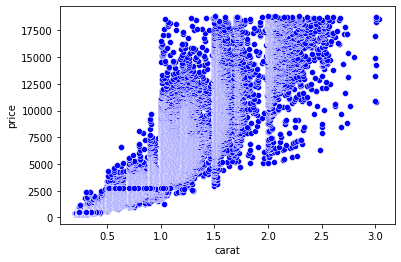

In [140]:
from turtle import color

sns.scatterplot(x='carat', y='price', color="blue", data=df3)

In [141]:
#Determinación 2
Indep2=df3[['depth']]
model2=LinearRegression()
model2.fit(X=Indep2, y=Dep)

#Coeficiente de DETERMINACIÓN
coef_Deter2 = model2.score(X=Indep2, y=Dep)
coef_Deter2

0.00017153612454423595

In [142]:
#Correlación 2
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

0.013097180022594022

<AxesSubplot:xlabel='depth', ylabel='price'>

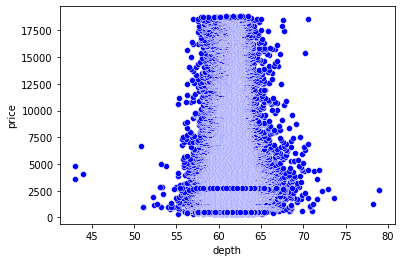

In [143]:
sns.scatterplot(x='depth', y='price', color="blue", data=df3)

In [144]:
#Determinación 3
Indep3=df3[['table']]
model3=LinearRegression()
model3.fit(X=Indep3, y=Dep)

#Coeficiente de DETERMINACIÓN
coef_Deter3 = model3.score(X=Indep3, y=Dep)
coef_Deter3

0.016185209504469666

In [145]:
#Correlación 3
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

0.1272211047918924

<AxesSubplot:xlabel='table', ylabel='price'>

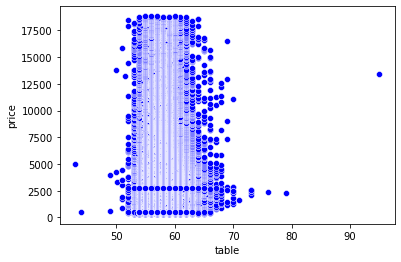

In [146]:
sns.scatterplot(x='table', y='price', color="blue", data=df3)

In [147]:
#Determinación 4
Indep4=df3[['carat','depth']]
model4=LinearRegression()
model4.fit(X=Indep4, y=Dep)

#Coeficiente de DETERMINACIÓN
coef_Deter4 = model4.score(X=Indep4, y=Dep)
coef_Deter4

0.8539602317646846

In [148]:
#Correlación 4
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

0.9240996871359088

<AxesSubplot:xlabel='carat', ylabel='price'>

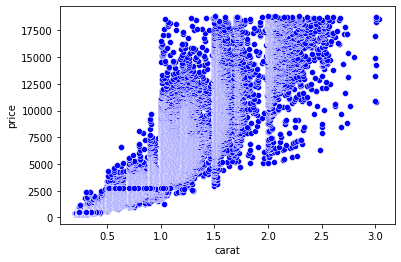

In [149]:
sns.scatterplot(x='carat', y='price', color="blue", data=df3)

In [150]:
#Determinación 5
Indep5=df3[['carat','table']]
model5=LinearRegression()
model5.fit(X=Indep5, y=Dep)

#Coeficiente de DETERMINACIÓN
coef_Deter5 = model5.score(X=Indep5, y=Dep)
coef_Deter5

0.8545290830903997

In [151]:
#Correlación 5
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

0.9244074226716268

In [152]:
#Determinación 6
Indep6=df3[['depth','table']]
model6=LinearRegression()
model6.fit(X=Indep6, y=Dep)

#Coeficiente de DETERMINACIÓN
coef_Deter6 = model6.score(X=Indep6, y=Dep)
coef_Deter6

0.016847178123375106

In [153]:
#Correlación 6
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

0.12979667993972382

In [154]:
#Determinación 7
Indep7=df3[['x','y','z']]
model7=LinearRegression()
model7.fit(X=Indep7, y=Dep)

#Coeficiente de DETERMINACIÓN
coef_Deter7 = model7.score(X=Indep7, y=Dep)
coef_Deter7

0.7876905525873562

In [155]:
#Correlación 7
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

0.8875193251909258

<AxesSubplot:xlabel='x', ylabel='price'>

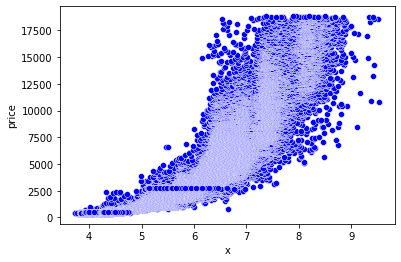

In [156]:
sns.scatterplot(x='x', y='price', color="blue", data=df3)

<AxesSubplot:xlabel='y', ylabel='price'>

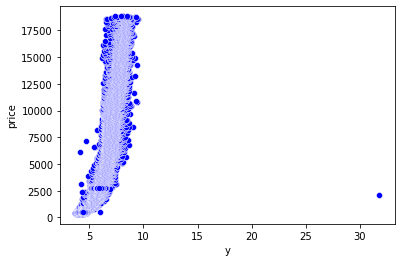

In [157]:
sns.scatterplot(x='y', y='price', color="blue", data=df3)

<AxesSubplot:xlabel='z', ylabel='price'>

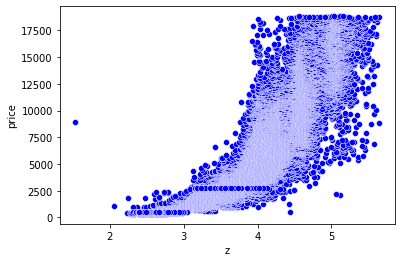

In [158]:
sns.scatterplot(x='z', y='price', color="blue", data=df3)

In [159]:
#Determinación 8
Indep8=df3[['x','y','z','carat','depth']]
model8=LinearRegression()
model8.fit(X=Indep8, y=Dep)

#Coeficiente de DETERMINACIÓN
coef_Deter8 = model8.score(X=Indep8, y=Dep)
coef_Deter8

0.8633060020989664

In [160]:
#Correlación 8
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

0.9291426166627846

In [161]:
#Determinación 9
Indep9=df3[['x','y','z','carat','depth','table']]
model9=LinearRegression()
model9.fit(X=Indep9, y=Dep)

#Coeficiente de DETERMINACIÓN
coef_Deter9 = model9.score(X=Indep9, y=Dep)
coef_Deter9

0.8661828395673256

In [162]:
#Correlación 9
coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl9

0.930689443137358

In [163]:
#Determinación 10
Indep10=df3[['x','y','z','carat']]
model10=LinearRegression()
model10.fit(X=Indep10, y=Dep)

#Coeficiente de DETERMINACIÓN
coef_Deter10 = model10.score(X=Indep10, y=Dep)
coef_Deter10

0.8630560677118363

In [164]:
#Correlación 10
coef_Correl10=np.sqrt(coef_Deter10)
coef_Correl10

0.9290081096049896

PREDICCIONES

In [165]:
df4_1 = df3[['price','carat','cut','color','clarity','depth','table','x','y','z']]

In [166]:
y_pred1= model1.predict(X=df3[['carat']])
dif1 = y_pred1 - Dep

In [167]:
#Insertamos la columna de predicciones y los errores en el DataFrame
df4_1.insert(0, 'Predicciones', y_pred1) #En la columna 0, nombre de la columnas y la variable
df4_1.insert(2, 'Diferencias', dif1)
df4_1

,Predicciones,price,Diferencias,carat,cut,color,clarity,depth,table,x,y,z
0,-504.208026,326.0,-830.208026,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,-660.656955,326.0,-986.656955,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,-504.208026,327.0,-831.208026,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,-34.861240,334.0,-368.861240,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,121.587689,335.0,-213.412311,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,3328.790728,2757.0,571.790728,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,3328.790728,2757.0,571.790728,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,3172.341800,2757.0,415.341800,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,4423.933230,2757.0,1666.933230,0.86,Premium,H,SI2,61.7,58.0,6.15,6.12,3.74


<AxesSubplot:xlabel='carat', ylabel='price'>

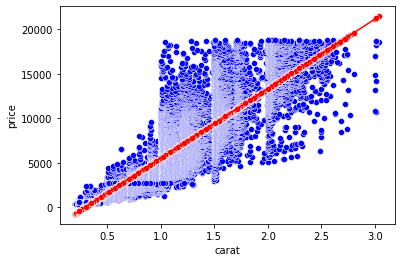

In [168]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='carat', y='price', color="blue", data=df4_1) #total real
sns.scatterplot(x='carat', y='Predicciones', color="red", data=df4_1) #predicción
sns.lineplot(x='carat', y='Predicciones', color="red", data=df4_1) #modelo

In [169]:
df4_2 = df3[['price','carat','cut','color','clarity','depth','table','x','y','z']]

In [170]:
y_pred2= model2.predict(X=df3[['depth']])
dif2 = y_pred2 - Dep

In [171]:
#Insertamos la columna de predicciones y los errores en el DataFrame
df4_2.insert(0, 'Predicciones', y_pred2) #En la columna 0, nombre de la columnas y la variable
df4_2.insert(2, 'Diferencias', dif2)
df4_2

,Predicciones,price,Diferencias,carat,cut,color,clarity,depth,table,x,y,z
0,3933.953396,326.0,3607.953396,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,3995.885045,326.0,3669.885045,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,4101.533154,327.0,3774.533154,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,3901.166052,334.0,3567.166052,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,3868.378708,335.0,3533.378708,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,3959.454663,2757.0,1202.454663,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,3875.664784,2757.0,1118.664784,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,3886.593899,2757.0,1129.593899,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,3926.667319,2757.0,1169.667319,0.86,Premium,H,SI2,61.7,58.0,6.15,6.12,3.74


<AxesSubplot:xlabel='depth', ylabel='price'>

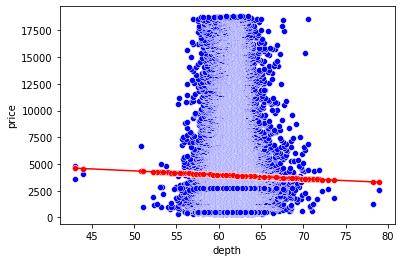

In [172]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='depth', y='price', color="blue", data=df4_2) #total real
sns.scatterplot(x='depth', y='Predicciones', color="red", data=df4_2) #predicción
sns.lineplot(x='depth', y='Predicciones', color="red", data=df4_2) #modelo

In [173]:
df4_3 = df3[['price','carat','cut','color','clarity','depth','table','x','y','z']]

In [174]:
y_pred3= model3.predict(X=df3[['table']])
dif3 = y_pred3 - Dep

In [175]:
#Insertamos la columna de predicciones y los errores en el DataFrame
df4_3.insert(0, 'Predicciones', y_pred3) #En la columna 0, nombre de la columnas y la variable
df4_3.insert(2, 'Diferencias', dif3)
df4_3

,Predicciones,price,Diferencias,carat,cut,color,clarity,depth,table,x,y,z
0,3368.032260,326.0,3042.032260,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,4728.025296,326.0,4402.025296,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,5634.687319,327.0,5307.687319,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,4048.028778,334.0,3714.028778,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,4048.028778,335.0,3713.028778,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,3821.363272,2757.0,1064.363272,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,3368.032260,2757.0,611.032260,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,4501.359790,2757.0,1744.359790,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,4048.028778,2757.0,1291.028778,0.86,Premium,H,SI2,61.7,58.0,6.15,6.12,3.74


<AxesSubplot:xlabel='table', ylabel='price'>

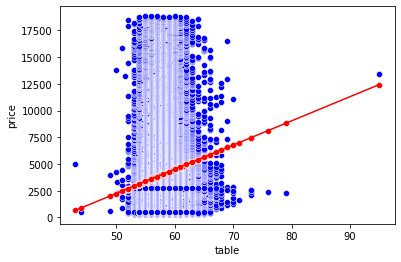

In [176]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='table', y='price', color="blue", data=df4_3) #total real
sns.scatterplot(x='table', y='Predicciones', color="red", data=df4_3) #predicción
sns.lineplot(x='table', y='Predicciones', color="red", data=df4_3) #modelo

In [177]:
df4_4 = df3[['price','carat','cut','color','clarity','depth','table','x','y','z']]

In [178]:
y_pred4= model4.predict(X=df3[['carat','depth']])
dif4 = y_pred4 - Dep

In [179]:
#Insertamos la columna de predicciones y los errores en el DataFrame
df4_4.insert(0, 'Predicciones', y_pred4) #En la columna 0, nombre de la columnas y la variable
df4_4.insert(2, 'Diferencias', dif4)
df4_4

,Predicciones,price,Diferencias,carat,cut,color,clarity,depth,table,x,y,z
0,-484.072075,326.0,-810.072075,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,-475.759795,326.0,-801.759795,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,-37.870982,327.0,-364.870982,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,-101.607916,334.0,-435.607916,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,-32.320006,335.0,-367.320006,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,3420.237132,2757.0,663.237132,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,3197.136586,2757.0,440.136586,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,3069.648533,2757.0,312.648533,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,4429.053787,2757.0,1672.053787,0.86,Premium,H,SI2,61.7,58.0,6.15,6.12,3.74


<AxesSubplot:xlabel='carat', ylabel='price'>

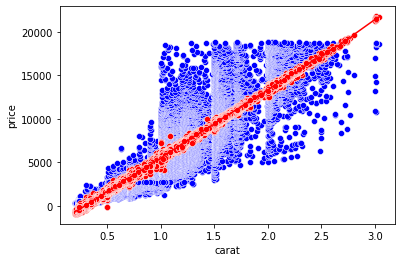

In [180]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='carat', y='price', color="blue", data=df4_4) #total real
sns.scatterplot(x='carat', y='Predicciones', color="red", data=df4_4) #predicción
sns.lineplot(x='carat', y='Predicciones', color="red", data=df4_4) #modelo

<AxesSubplot:xlabel='depth', ylabel='price'>

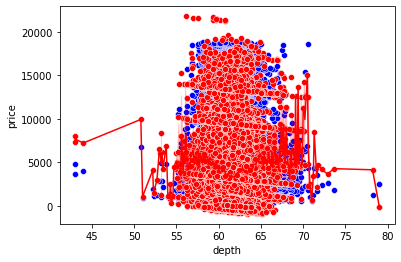

In [181]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='depth', y='price', color="blue", data=df4_4) #total real
sns.scatterplot(x='depth', y='Predicciones', color="red", data=df4_4) #predicción
sns.lineplot(x='depth', y='Predicciones', color="red", data=df4_4) #modelo

In [182]:
df4_5 = df3[['price','carat','cut','color','clarity','depth','table','x','y','z']]

In [183]:
y_pred5= model5.predict(X=df3[['carat','table']])
dif5 = y_pred5 - Dep

In [184]:
#Insertamos la columna de predicciones y los errores en el DataFrame
df4_5.insert(0, 'Predicciones', y_pred5) #En la columna 0, nombre de la columnas y la variable
df4_5.insert(2, 'Diferencias', dif5)
df4_5

,Predicciones,price,Diferencias,carat,cut,color,clarity,depth,table,x,y,z
0,-353.799961,326.0,-679.799961,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,-970.867383,326.0,-1296.867383,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,-1119.280502,327.0,-1446.280502,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,-110.106829,334.0,-444.106829,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,47.672269,335.0,-287.327731,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,3358.691830,2757.0,601.691830,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,3511.787938,2757.0,754.787938,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,2971.268570,2757.0,214.268570,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,4386.597461,2757.0,1629.597461,0.86,Premium,H,SI2,61.7,58.0,6.15,6.12,3.74


<AxesSubplot:xlabel='carat', ylabel='price'>

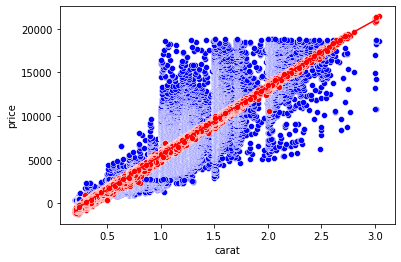

In [185]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='carat', y='price', color="blue", data=df4_5) #total real
sns.scatterplot(x='carat', y='Predicciones', color="red", data=df4_5) #predicción
sns.lineplot(x='carat', y='Predicciones', color="red", data=df4_5) #modelo

<AxesSubplot:xlabel='table', ylabel='price'>

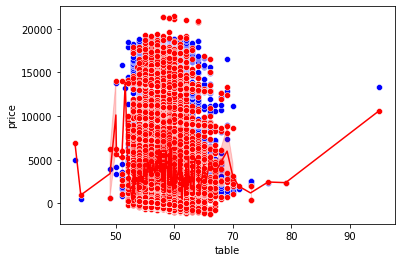

In [186]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='table', y='price', color="blue", data=df4_5) #total real
sns.scatterplot(x='table', y='Predicciones', color="red", data=df4_5) #predicción
sns.lineplot(x='table', y='Predicciones', color="red", data=df4_5) #modelo

In [187]:
df4_6 = df3[['price','carat','cut','color','clarity','depth','table','x','y','z']]

In [188]:
y_pred6= model6.predict(X=df3[['depth','table']])
dif6 = y_pred6 - Dep

In [189]:
#Insertamos la columna de predicciones y los errores en el DataFrame
df4_6.insert(0, 'Predicciones', y_pred6) #En la columna 0, nombre de la columnas y la variable
df4_6.insert(2, 'Diferencias', dif6)
df4_6

,Predicciones,price,Diferencias,carat,cut,color,clarity,depth,table,x,y,z
0,3314.520110,326.0,2988.520110,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,4632.406653,326.0,4306.406653,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,5378.628587,327.0,5051.628587,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,4104.583712,334.0,3770.583712,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,4172.017024,335.0,3837.017024,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,3743.825504,2757.0,986.825504,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,3434.401555,2757.0,677.401555,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,4616.307599,2757.0,1859.307599,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,4052.135580,2757.0,1295.135580,0.86,Premium,H,SI2,61.7,58.0,6.15,6.12,3.74


<AxesSubplot:xlabel='depth', ylabel='price'>

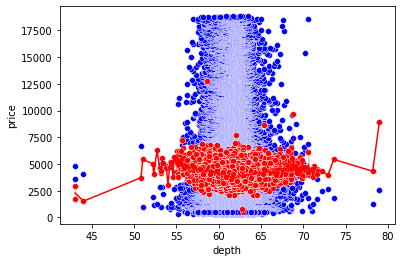

In [190]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='depth', y='price', color="blue", data=df4_6) #total real
sns.scatterplot(x='depth', y='Predicciones', color="red", data=df4_6) #predicción
sns.lineplot(x='depth', y='Predicciones', color="red", data=df4_6) #modelo

<AxesSubplot:xlabel='table', ylabel='price'>

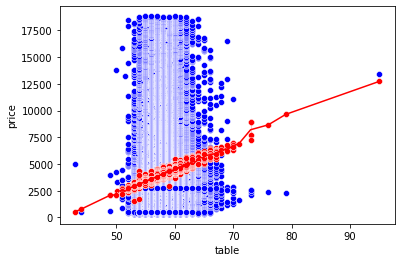

In [191]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='table', y='price', color="blue", data=df4_6) #total real
sns.scatterplot(x='table', y='Predicciones', color="red", data=df4_6) #predicción
sns.lineplot(x='table', y='Predicciones', color="red", data=df4_6) #modelo

In [192]:
df4_7 = df3[['price','carat','cut','color','clarity','depth','table','x','y','z']]

In [193]:
y_pred7= model7.predict(X=df3[['x','y','z']])
dif7 = y_pred7 - Dep

In [194]:
#Insertamos la columna de predicciones y los errores en el DataFrame
df4_7.insert(0, 'Predicciones', y_pred7) #En la columna 0, nombre de la columnas y la variable
df4_7.insert(2, 'Diferencias', dif7)
df4_7

,Predicciones,price,Diferencias,carat,cut,color,clarity,depth,table,x,y,z
0,-1710.224377,326.0,-2036.224377,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,-2020.988706,326.0,-2346.988706,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,-1547.066122,327.0,-1874.066122,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,-880.001658,334.0,-1214.001658,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,-421.856270,335.0,-756.856270,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,3953.861827,2757.0,1196.861827,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,3915.999494,2757.0,1158.999494,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,3768.732092,2757.0,1011.732092,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,5190.757783,2757.0,2433.757783,0.86,Premium,H,SI2,61.7,58.0,6.15,6.12,3.74


<AxesSubplot:xlabel='x', ylabel='price'>

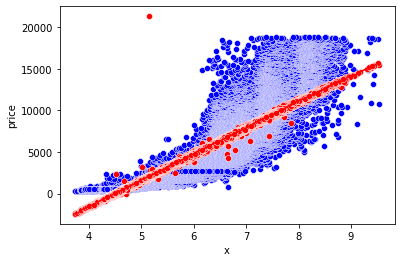

In [195]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='x', y='price', color="blue", data=df4_7) #total real
sns.scatterplot(x='x', y='Predicciones', color="red", data=df4_7) #predicción
sns.lineplot(x='x', y='Predicciones', color="red", data=df4_7) #modelo

<AxesSubplot:xlabel='y', ylabel='price'>

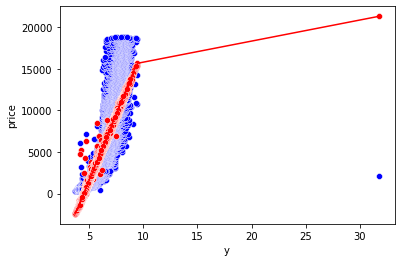

In [196]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='y', y='price', color="blue", data=df4_7) #total real
sns.scatterplot(x='y', y='Predicciones', color="red", data=df4_7) #predicción
sns.lineplot(x='y', y='Predicciones', color="red", data=df4_7) #modelo

<AxesSubplot:xlabel='z', ylabel='price'>

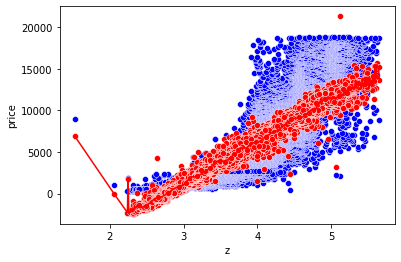

In [197]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='z', y='price', color="blue", data=df4_7) #total real
sns.scatterplot(x='z', y='Predicciones', color="red", data=df4_7) #predicción
sns.lineplot(x='z', y='Predicciones', color="red", data=df4_7) #modelo

In [198]:
df4_8 = df3[['price','carat','cut','color','clarity','depth','table','x','y','z']]

In [199]:
y_pred8= model8.predict(X=df3[['x','y','z','carat','depth']])
dif8 = y_pred8 - Dep

In [200]:
#Insertamos la columna de predicciones y los errores en el DataFrame
df4_8.insert(0, 'Predicciones', y_pred8) #En la columna 0, nombre de la columnas y la variable
df4_8.insert(2, 'Diferencias', dif8)
df4_8

,Predicciones,price,Diferencias,carat,cut,color,clarity,depth,table,x,y,z
0,329.747355,326.0,3.747355,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,415.325355,326.0,89.325355,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,853.492103,327.0,526.492103,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,468.316172,334.0,134.316172,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,317.204071,335.0,-17.795929,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,3146.513162,2757.0,389.513162,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,2895.455772,2757.0,138.455772,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,2743.366243,2757.0,-13.633757,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,3981.292955,2757.0,1224.292955,0.86,Premium,H,SI2,61.7,58.0,6.15,6.12,3.74


<AxesSubplot:xlabel='x', ylabel='price'>

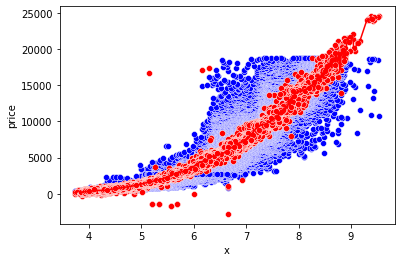

In [201]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='x', y='price', color="blue", data=df4_8) #total real
sns.scatterplot(x='x', y='Predicciones', color="red", data=df4_8) #predicción
sns.lineplot(x='x', y='Predicciones', color="red", data=df4_8) #modelo

<AxesSubplot:xlabel='y', ylabel='price'>

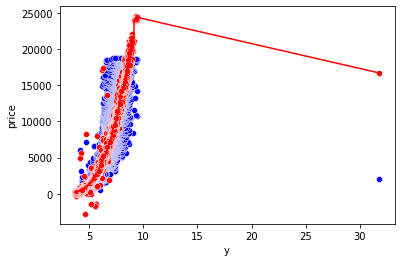

In [202]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='y', y='price', color="blue", data=df4_8) #total real
sns.scatterplot(x='y', y='Predicciones', color="red", data=df4_8) #predicción
sns.lineplot(x='y', y='Predicciones', color="red", data=df4_8) #modelo

<AxesSubplot:xlabel='z', ylabel='price'>

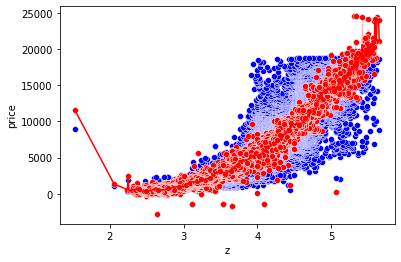

In [203]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='z', y='price', color="blue", data=df4_8) #total real
sns.scatterplot(x='z', y='Predicciones', color="red", data=df4_8) #predicción
sns.lineplot(x='z', y='Predicciones', color="red", data=df4_8) #modelo

<AxesSubplot:xlabel='carat', ylabel='price'>

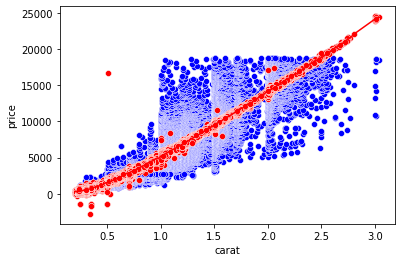

In [204]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='carat', y='price', color="blue", data=df4_8) #total real
sns.scatterplot(x='carat', y='Predicciones', color="red", data=df4_8) #predicción
sns.lineplot(x='carat', y='Predicciones', color="red", data=df4_8) #modelo

<AxesSubplot:xlabel='depth', ylabel='price'>

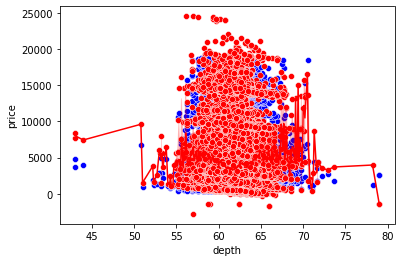

In [205]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='depth', y='price', color="blue", data=df4_8) #total real
sns.scatterplot(x='depth', y='Predicciones', color="red", data=df4_8) #predicción
sns.lineplot(x='depth', y='Predicciones', color="red", data=df4_8) #modelo

In [206]:
df4_9 = df3[['price','carat','cut','color','clarity','depth','table','x','y','z']]

In [207]:
y_pred9= model9.predict(X=df3[['x','y','z','carat','depth','table']])
dif9 = y_pred9 - Dep

In [208]:
#Insertamos la columna de predicciones y los errores en el DataFrame
df4_9.insert(0, 'Predicciones', y_pred9) #En la columna 0, nombre de la columnas y la variable
df4_9.insert(2, 'Diferencias', dif9)
df4_9

,Predicciones,price,Diferencias,carat,cut,color,clarity,depth,table,x,y,z
0,537.261135,326.0,211.261135,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,88.245022,326.0,-237.754978,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,229.463233,327.0,-97.536767,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,333.458013,334.0,-0.541987,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,149.140355,335.0,-185.859645,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,3230.821003,2757.0,473.821003,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,3066.192999,2757.0,309.192999,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,2422.122547,2757.0,-334.877453,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,3955.491339,2757.0,1198.491339,0.86,Premium,H,SI2,61.7,58.0,6.15,6.12,3.74


<AxesSubplot:xlabel='x', ylabel='price'>

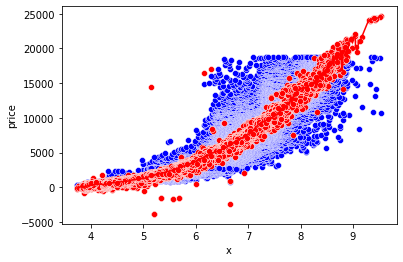

In [209]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='x', y='price', color="blue", data=df4_9) #total real
sns.scatterplot(x='x', y='Predicciones', color="red", data=df4_9) #predicción
sns.lineplot(x='x', y='Predicciones', color="red", data=df4_9) #modelo

<AxesSubplot:xlabel='y', ylabel='price'>

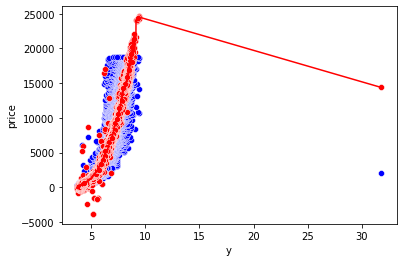

In [210]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='y', y='price', color="blue", data=df4_9) #total real
sns.scatterplot(x='y', y='Predicciones', color="red", data=df4_9) #predicción
sns.lineplot(x='y', y='Predicciones', color="red", data=df4_9) #modelo

<AxesSubplot:xlabel='z', ylabel='price'>

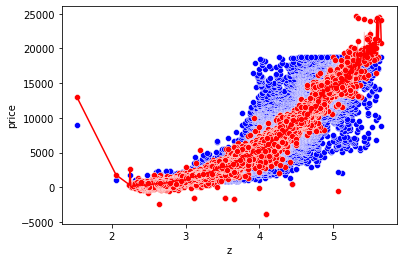

In [211]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='z', y='price', color="blue", data=df4_9) #total real
sns.scatterplot(x='z', y='Predicciones', color="red", data=df4_9) #predicción
sns.lineplot(x='z', y='Predicciones', color="red", data=df4_9) #modelo

<AxesSubplot:xlabel='carat', ylabel='price'>

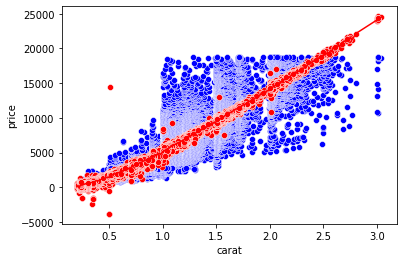

In [212]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='carat', y='price', color="blue", data=df4_9) #total real
sns.scatterplot(x='carat', y='Predicciones', color="red", data=df4_9) #predicción
sns.lineplot(x='carat', y='Predicciones', color="red", data=df4_9) #modelo

<AxesSubplot:xlabel='depth', ylabel='price'>

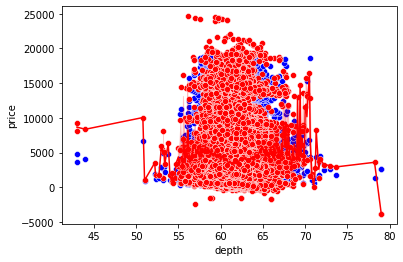

In [213]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='depth', y='price', color="blue", data=df4_9) #total real
sns.scatterplot(x='depth', y='Predicciones', color="red", data=df4_9) #predicción
sns.lineplot(x='depth', y='Predicciones', color="red", data=df4_9) #modelo

<AxesSubplot:xlabel='table', ylabel='price'>

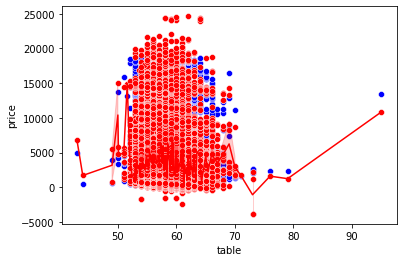

In [214]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='table', y='price', color="blue", data=df4_9) #total real
sns.scatterplot(x='table', y='Predicciones', color="red", data=df4_9) #predicción
sns.lineplot(x='table', y='Predicciones', color="red", data=df4_9) #modelo

In [215]:
df4_10 = df3[['price','carat','cut','color','clarity','depth','table','x','y','z']]

In [216]:
y_pred10= model10.predict(X=df3[['x','y','z','carat']])
dif10 = y_pred10 - Dep

In [217]:
#Insertamos la columna de predicciones y los errores en el DataFrame
df4_10.insert(0, 'Predicciones', y_pred10) #En la columna 0, nombre de la columnas y la variable
df4_10.insert(2, 'Diferencias', dif10)
df4_10

,Predicciones,price,Diferencias,carat,cut,color,clarity,depth,table,x,y,z
0,328.415602,326.0,2.415602,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,336.383788,326.0,10.383788,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,608.798532,327.0,281.798532,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,493.957710,334.0,159.957710,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,388.673212,335.0,53.673212,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,3124.792074,2757.0,367.792074,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,2897.996930,2757.0,140.996930,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,2758.550952,2757.0,1.550952,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,4077.674490,2757.0,1320.674490,0.86,Premium,H,SI2,61.7,58.0,6.15,6.12,3.74


<AxesSubplot:xlabel='x', ylabel='price'>

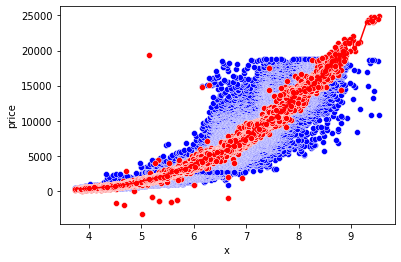

In [218]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='x', y='price', color="blue", data=df4_10) #total real
sns.scatterplot(x='x', y='Predicciones', color="red", data=df4_10) #predicción
sns.lineplot(x='x', y='Predicciones', color="red", data=df4_10) #modelo

<AxesSubplot:xlabel='y', ylabel='price'>

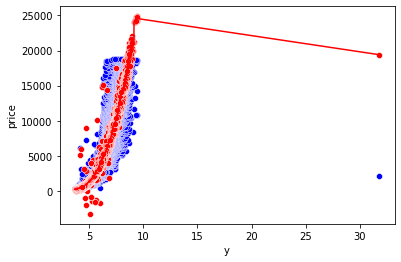

In [219]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='y', y='price', color="blue", data=df4_10) #total real
sns.scatterplot(x='y', y='Predicciones', color="red", data=df4_10) #predicción
sns.lineplot(x='y', y='Predicciones', color="red", data=df4_10) #modelo

<AxesSubplot:xlabel='z', ylabel='price'>

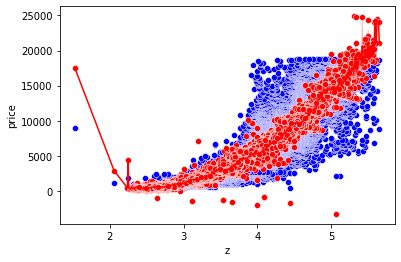

In [220]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='z', y='price', color="blue", data=df4_10) #total real
sns.scatterplot(x='z', y='Predicciones', color="red", data=df4_10) #predicción
sns.lineplot(x='z', y='Predicciones', color="red", data=df4_10) #modelo

<AxesSubplot:xlabel='carat', ylabel='price'>

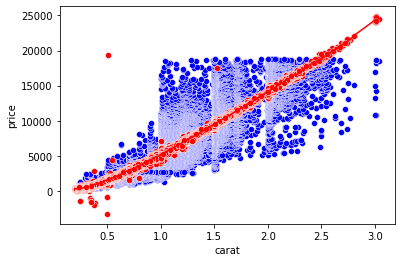

In [221]:
#Visualizamos la gráfica comparativa entre real y predecido

sns.scatterplot(x='carat', y='price', color="blue", data=df4_10) #total real
sns.scatterplot(x='carat', y='Predicciones', color="red", data=df4_10) #predicción
sns.lineplot(x='carat', y='Predicciones', color="red", data=df4_10) #modelo

PAIRPLOTS

In [223]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df3.corr()
Corr_Factors

,carat,depth,table,price,x,y,z
carat,1.000000,0.023560,0.182741,0.923442,0.978939,0.972832,0.977532
depth,0.023560,1.000000,-0.296115,-0.013097,-0.028038,-0.030963,0.093590
table,0.182741,-0.296115,1.000000,0.127221,0.196487,0.188860,0.156191
price,0.923442,-0.013097,0.127221,1.000000,0.887003,0.883872,0.882163
x,0.978939,-0.028038,0.196487,0.887003,1.000000,0.993329,0.991340
y,0.972832,-0.030963,0.188860,0.883872,0.993329,1.000000,0.986979
z,0.977532,0.093590,0.156191,0.882163,0.991340,0.986979,1.000000


In [224]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,carat,depth,table,price,x,y,z
carat,1.000000,0.023560,0.182741,0.923442,0.978939,0.972832,0.977532
depth,0.023560,1.000000,0.296115,0.013097,0.028038,0.030963,0.093590
table,0.182741,0.296115,1.000000,0.127221,0.196487,0.188860,0.156191
price,0.923442,0.013097,0.127221,1.000000,0.887003,0.883872,0.882163
x,0.978939,0.028038,0.196487,0.887003,1.000000,0.993329,0.991340
y,0.972832,0.030963,0.188860,0.883872,0.993329,1.000000,0.986979
z,0.977532,0.093590,0.156191,0.882163,0.991340,0.986979,1.000000


<AxesSubplot:>

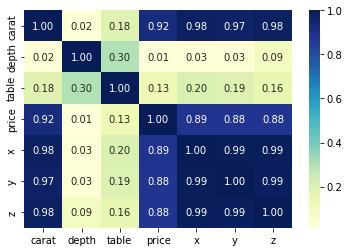

In [225]:
#Ajustamos el mapa de calor de los coeficientes de correlación dándole atención principalmente a price
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map